In [1]:
import numpy as np
import pandas as pd

In [2]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
df = anime.merge(rating, on='anime_id')
df = df.rename(columns={"rating_user": "user_rating"})

In [6]:
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [7]:
df.isna().sum()

anime_id      0
name          0
genre       110
type          4
episodes      0
rating_x      6
members       0
user_id       0
rating_y      0
dtype: int64

In [8]:
df["rating_y"].replace({-1: np.nan}, inplace=True)
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


In [9]:
df.dropna(axis = 0, inplace = True)
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating_x    0
members     0
user_id     0
rating_y    0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337145 entries, 0 to 7813724
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   name      object 
 2   genre     object 
 3   type      object 
 4   episodes  object 
 5   rating_x  float64
 6   members   int64  
 7   user_id   int64  
 8   rating_y  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 483.5+ MB


In [13]:
import re
def name_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

df['name'] = df['name'].apply(name_cleaning)

In [14]:
df['name']

0                                             Kimi no Na wa.
1                                             Kimi no Na wa.
2                                             Kimi no Na wa.
3                                             Kimi no Na wa.
5                                             Kimi no Na wa.
                                 ...                        
7813713         Toushindai My Lover: Minami tai Mecha-Minami
7813716                                          Under World
7813717                                          Under World
7813720                       Violence Gekiga David no Hoshi
7813724    Violence Gekiga Shin David no Hoshi: Inma Dens...
Name: name, Length: 6337145, dtype: object

## Exploratory Data Analysis

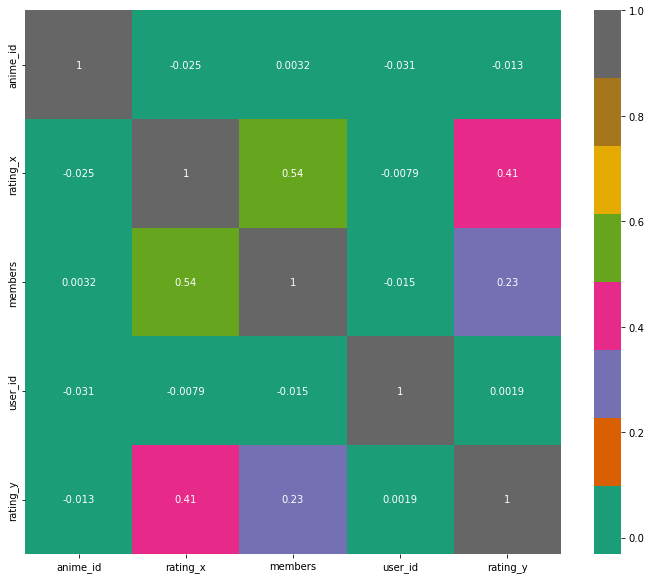

In [15]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(12,10))
cor = df.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Dark2)
plt.show()

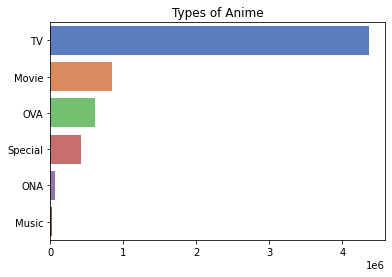

In [16]:
#Anime types
type_count = df['type'].value_counts()

sb.barplot(x=type_count.values,
            y=type_count.index,
            palette='muted').set_title('Types of Anime')
plt.show()

In [17]:
#rating of anime
top_anime = df.sort_values(by = 'rating_x',ascending = False)
top_anime.drop_duplicates(subset=['name'], inplace=True)
top_anime = top_anime[['name', 'rating_x']].sort_values(by = 'rating_x',ascending = False).head(10)

In [18]:
top_anime

,name,rating_x
0,Kimi no Na wa.,9.37
18623,Fullmetal Alchemist: Brotherhood,9.26
27693,Gintama°,9.25
41017,Steins;Gate,9.17
49875,Gintama,9.16
51932,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.15
58060,Hunter x Hunter (2011),9.13
65504,Gintama: Enchousen,9.11
61534,Ginga Eiyuu Densetsu,9.11
64346,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,9.10


Text(0.5, 1.0, 'Rating of websites')

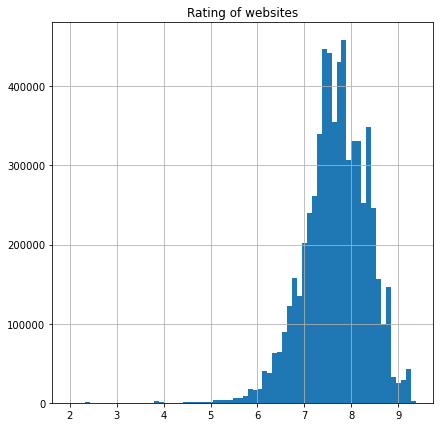

In [19]:
#Distribution of rating
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
df['rating_x'].hist(bins=70)
plt.title("Rating of websites")

## Creating Tags

In [20]:
#Removing the comma in genre
def genre_cleaning(text):
    text = re.sub(r",","", text)
    return text

df['genre'] = df['genre'].apply(genre_cleaning)
df['genre']

0          Drama Romance School Supernatural
1          Drama Romance School Supernatural
2          Drama Romance School Supernatural
3          Drama Romance School Supernatural
5          Drama Romance School Supernatural
                         ...                
7813713                               Hentai
7813716                               Hentai
7813717                               Hentai
7813720                               Hentai
7813724                               Hentai
Name: genre, Length: 6337145, dtype: object

In [21]:
#Creating a tags column in data frame
df['tags'] = df['genre'] + " " + df['type']

In [22]:
#Drop the duplicate columns
df = df.drop_duplicates(subset=['anime_id', 'name'], keep='first')

In [23]:
df.iloc[0:20]

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,tags
0,32281,Kimi no Na wa.,Drama Romance School Supernatural,Movie,1,9.37,200630,99,5.0,Drama Romance School Supernatural Movie
2199,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...,TV,64,9.26,793665,3,10.0,Action Adventure Drama Fantasy Magic Military ...
26774,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...,TV,51,9.25,114262,43,10.0,Action Comedy Historical Parody Samurai Sci-Fi...
28159,9253,Steins;Gate,Sci-Fi Thriller,TV,24,9.17,673572,5,9.0,Sci-Fi Thriller TV
47442,9969,Gintama,Action Comedy Historical Parody Samurai Sci-Fi...,TV,51,9.16,151266,5,9.0,Action Comedy Historical Parody Samurai Sci-Fi...
51115,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,Comedy Drama School Shounen Sports,TV,10,9.15,93351,17,9.0,Comedy Drama School Shounen Sports TV
52348,11061,Hunter x Hunter (2011),Action Adventure Shounen Super Power,TV,148,9.13,425855,7,9.0,Action Adventure Shounen Super Power TV
60923,820,Ginga Eiyuu Densetsu,Drama Military Sci-Fi Space,OVA,110,9.11,80679,183,10.0,Drama Military Sci-Fi Space OVA
61826,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,Action Comedy Historical Parody Samurai Sci-Fi...,Movie,1,9.10,72534,5,10.0,Action Comedy Historical Parody Samurai Sci-Fi...
64351,15417,Gintama: Enchousen,Action Comedy Historical Parody Samurai Sci-Fi...,TV,13,9.11,81109,5,8.0,Action Comedy Historical Parody Samurai Sci-Fi...


In [24]:
#Creating new dataframe
df1 = df.drop(['genre', 'type', 'episodes', 'rating_x', 'members', 'user_id', 'rating_y'], axis=1)
df1.head(5)

,anime_id,name,tags
0,32281,Kimi no Na wa.,Drama Romance School Supernatural Movie
2199,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...
26774,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...
28159,9253,Steins;Gate,Sci-Fi Thriller TV
47442,9969,Gintama,Action Comedy Historical Parody Samurai Sci-Fi...


In [25]:
df1 = df1.reset_index()
df1 = df1.drop(['index'], axis=1)
df1.rename(columns = {'name':'animename'}, inplace = True)
df1.head()

,anime_id,animename,tags
0,32281,Kimi no Na wa.,Drama Romance School Supernatural Movie
1,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...
2,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...
3,9253,Steins;Gate,Sci-Fi Thriller TV
4,9969,Gintama,Action Comedy Historical Parody Samurai Sci-Fi...


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9892 entries, 0 to 9891
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anime_id   9892 non-null   int64 
 1   animename  9892 non-null   object
 2   tags       9892 non-null   object
dtypes: int64(1), object(2)
memory usage: 232.0+ KB


## Model Building

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv = CountVectorizer(max_features=50, stop_words='english')

In [29]:
vectors = cv.fit_transform(df1["tags"]).toarray()

In [30]:
vectors.shape

(9892, 50)

In [31]:
cv.get_feature_names()

['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'movie',
 'music',
 'mystery',
 'ona',
 'ova',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'special',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'tv',
 'vampire',
 'yuri']

## Calculating Cosine Similarity

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)
similarity

array([[1.        , 0.15811388, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15811388, 1.        , 0.35355339, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35355339, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [33]:
def recommend(anime):
    index = df1[df1['animename'] == anime].index[0]
    distances = similarity[index]
    anime_list = sorted(list(enumerate(distances)),reverse=True,key = lambda x: x[1])[1:6]
    for i in anime_list:
        print(df1.iloc[i[0]].animename)

In [34]:
recommend('Gintama')

Gintama
Gintama: Enchousen
Gintama
Gintama: Yorinuki Gintama-san on Theater 2D
Gintama Movie: Shinyaku Benizakura-hen


In [35]:
recommend('Hunter x Hunter (2011)')

Hunter x Hunter
Beast Wars Neo
Big Order (TV)
Rekka no Honoo
Eat-Man 98


In [36]:
recommend('One Piece Movie 1')

One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura
One Piece Movie 5: Norowareta Seiken
One Piece Movie 2: Nejimaki-jima no Daibouken
One Piece Movie 1
One Piece Movie 3: Chinjuu-jima no Chopper Oukoku


In [37]:
import pickle

In [42]:
pickle.dump(df1.to_dict(),open('anime_dict.pkl','wb'))

In [43]:
pickle.dump(similarity,open('sim.pkl','wb'))